# Dataset 

business_id
business_id
Text
business_name
business_name
Text
business_address
business_address
Text
business_city
business_city
Text
business_state
business_state
Text
business_postal_code
business_postal_code
Text
business_latitude
business_latitude
Number
business_longitude
business_longitude
Number
business_location
business_location
Point
business_phone_number
business_phone_number
Text
inspection_id
inspection_id
Text
inspection_date
inspection_date
Floating Timestamp
inspection_score
inspection_score
Number
inspection_type
inspection_type
Text
violation_id
violation_id
Text
violation_description
violation_description
Text
risk_category
risk_category
Text



# Importing packages 


In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests as req

# Importing the data 

In [75]:
url = "https://soda.demo.socrata.com/resource/4tka-6guv.json?$limit=50000"
response = req.get(url)
print(len(response.json()))


10821


In [76]:
import requests
import pandas as pd
from io import StringIO

base_url = "https://data.sfgov.org/resource/pyih-qa8i.csv"
batch_size = 54000
offset = 0
all_data = []

while True:
    params = {
        "$limit": batch_size,
        "$offset": offset
    }

    response = requests.get(base_url, params=params)

    if response.status_code != 200:
        print(f"Request failed with status code {response.status_code}")
        break

    # Convert CSV response to DataFrame
    chunk = pd.read_csv(StringIO(response.text))

    # If the chunk is empty, we've reached the end
    if chunk.empty:
        break

    all_data.append(chunk)
    print(f"Retrieved {len(chunk)} rows at offset {offset}")

    offset += batch_size

# Concatenate all batches
sf_phi = pd.concat(all_data, ignore_index=True)
print(f"Total retrieved: {len(sf_phi)} rows")




Retrieved 53973 rows at offset 0
Total retrieved: 53973 rows


# Initial Data Exploration 

In [77]:
sf_phi.shape

(53973, 22)

In [78]:
sf_phi.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.415578e+10,...,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,...,NaN,Reinspection/Followup,NaN,NaN,NaN,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,...,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


In [79]:
sf_phi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   business_id                  53973 non-null  int64  
 1   business_name                53973 non-null  object 
 2   business_address             53973 non-null  object 
 3   business_city                53973 non-null  object 
 4   business_state               53973 non-null  object 
 5   business_postal_code         52787 non-null  object 
 6   business_latitude            27475 non-null  float64
 7   business_longitude           27475 non-null  float64
 8   business_location            27460 non-null  object 
 9   business_phone_number        17672 non-null  float64
 10  inspection_id                53973 non-null  object 
 11  inspection_date              53973 non-null  object 
 12  inspection_score             39541 non-null  float64
 13  inspection_type 

In [80]:
sf_phi.describe()

,business_id,business_latitude,business_longitude,business_phone_number,inspection_score,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md
count,53973.000000,27475.000000,27475.000000,1.767200e+04,39541.000000,27435.000000,27435.000000,27447.000000,27447.000000,27447.000000
mean,55218.877883,37.750969,-122.360157,1.415541e+10,86.221669,56.963149,56.963149,5.359165,5.632055,19.459868
std,36165.556449,0.882643,2.859985,1.356438e+06,8.489218,34.804693,34.804693,2.687570,3.298057,11.615126
min,19.000000,0.000000,-122.510896,1.415020e+10,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7558.000000,37.756133,-122.437069,1.415537e+10,81.000000,28.000000,28.000000,3.000000,3.000000,8.000000
50%,69186.000000,37.780133,-122.419107,1.415561e+10,87.000000,53.000000,53.000000,6.000000,5.000000,20.000000
75%,86385.000000,37.788864,-122.407417,1.415580e+10,92.000000,95.000000,95.000000,8.000000,9.000000,30.000000
max,102705.000000,37.824494,0.000000,1.415988e+10,100.000000,117.000000,117.000000,10.000000,11.000000,41.000000


In [81]:
sf_phi.isna().sum()

business_id                        0
business_name                      0
business_address                   0
business_city                      0
business_state                     0
business_postal_code            1186
business_latitude              26498
business_longitude             26498
business_location              26513
business_phone_number          36301
inspection_id                      0
inspection_date                    0
inspection_score               14432
inspection_type                    0
violation_id                   13720
violation_description          13720
risk_category                  13720
:@computed_region_jwn9_ihcz    26538
:@computed_region_6qbp_sg9q    26538
:@computed_region_qgnn_b9vv    26526
:@computed_region_26cr_cadq    26526
:@computed_region_ajp5_b2md    26526
dtype: int64

Now to visualise the inspection date 

In [83]:
inspection_dates = sf_phi.groupby(['business_name','inspection_date' ,'inspection_type','violation_id','inspection_score']).size()
inspection_dates = inspection_dates.sort_values( ascending =True)
inspection_dates.sdrop_duplicates(subset='business_name', keep='first')

AttributeError: 'Series' object has no attribute 'sdrop_duplicates'

In [84]:
# Step 1: Sort by business and date (optional, but makes output easier to read)
sf_phi_sorted = sf_phi.sort_values(['business_name', 'inspection_date'])

# Step 2: Drop duplicates based on business_name and inspection_score
unique_scores_per_business = sf_phi_sorted.drop_duplicates(subset=['inspection_date', 'inspection_score'])

# Step 3: (Optional) Sort by lowest score per business
unique_scores_per_business = unique_scores_per_business.sort_values(by=['business_name', 'inspection_score'])

# Step 4: Display
unique_scores_per_business[['business_name', 'inspection_date', 'inspection_score', 'inspection_type']].head(10)


,business_name,inspection_date,inspection_score,inspection_type
42692,"#1 VERJUS CAVE, #2 VERJUS",2018-12-21T00:00:00.000,100.0,Routine - Unscheduled
40838,100137 Cloud Club,2019-04-29T00:00:00.000,NaN,New Construction
39528,100137 Cloud Club,2019-07-19T00:00:00.000,NaN,New Ownership - Followup
19504,111 Minna Gallery,2017-01-26T00:00:00.000,92.0,Routine - Unscheduled
26502,111 Minna Gallery,2019-06-04T00:00:00.000,94.0,Routine - Unscheduled
38494,111 Minna Gallery,2018-05-01T00:00:00.000,100.0,Routine - Unscheduled
49099,111 Minna Gallery,2017-01-13T00:00:00.000,NaN,Routine - Unscheduled
51391,111 Minna Gallery,2017-01-19T00:00:00.000,NaN,Routine - Unscheduled
25055,12 Tribes Kosher Foods,2019-05-29T00:00:00.000,98.0,Routine - Unscheduled
19985,1428 Haight,2018-08-17T00:00:00.000,77.0,Routine - Unscheduled


In [85]:
# Group by multiple columns to count each unique inspection
inspection_dates = unique_scores_per_business.groupby(
    ['inspection_score', 'business_name', 'inspection_date', 'inspection_type', 'violation_id', 'risk_category', 'violation_description']
).size().reset_index(name='count')

# Sort by inspection score ascending (lowest score first)
inspection_dates = inspection_dates.sort_values(by='inspection_score', ascending=True)

# Display
inspection_dates.head(10)


,inspection_score,business_name,inspection_date,inspection_type,violation_id,risk_category,violation_description,count
0,45.0,Lollipot,2018-05-22T00:00:00.000,Routine - Unscheduled,86718_20180522_103116,Moderate Risk,Inadequate food safety knowledge or lack of ce...,1
1,46.0,SUNFLOWER RESTAURANT,2019-03-27T00:00:00.000,Routine - Unscheduled,1154_20190327_103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,1
2,48.0,CHINA FIRST INC.,2019-07-01T00:00:00.000,Routine - Unscheduled,10877_20190701_103138,Low Risk,Improper storage use or identification of toxi...,1
3,51.0,La Jefa,2018-09-14T00:00:00.000,Routine - Unscheduled,67237_20180914_103148,Low Risk,No thermometers or uncalibrated thermometers,1
4,54.0,Chaat Corner,2018-10-01T00:00:00.000,Routine - Unscheduled,84590_20181001_103103,High Risk,High risk food holding temperature,1
5,55.0,Golden King Vietnamese Restaurant,2018-12-03T00:00:00.000,Routine - Unscheduled,71310_20181203_103149,Low Risk,Wiping cloths not clean or properly stored or ...,1
6,55.0,Hello Sandwich & Noodle,2018-08-22T00:00:00.000,Routine - Unscheduled,91843_20180822_103124,Moderate Risk,Inadequately cleaned or sanitized food contact...,1
7,55.0,Tip Top Market,2019-08-20T00:00:00.000,Routine - Unscheduled,59828_20190820_103118,Moderate Risk,Employee eating or smoking,1
10,57.0,New Jumbo Seafood Restaurant,2019-01-23T00:00:00.000,Routine - Unscheduled,69282_20190123_103138,Low Risk,Improper storage use or identification of toxi...,1
11,57.0,Taqueria Lolita,2018-08-21T00:00:00.000,Routine - Unscheduled,90622_20180821_103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,1


In [86]:
grouped_inspections = inspection_dates.groupby(['business_name','inspection_score', 'inspection_date']).size().reset_index(name='count')

grouped_inspections = grouped_inspections.sort_values(by=['business_name', 'inspection_date'])





In [87]:
# Step 1: Sort by business and inspection date
sorted_scores = unique_scores_per_business.sort_values(by=['business_name', 'inspection_date'])

# Step 2: Get first and last scores per business
first_scores = sorted_scores.groupby('business_name').first().reset_index()
last_scores = sorted_scores.groupby('business_name').last().reset_index()

# Step 3: Merge and calculate change
score_change = first_scores[['business_name', 'inspection_score']].merge(
    last_scores[['business_name', 'inspection_score']],
    on='business_name',
    suffixes=('_first', '_last')
)

score_change['score_diff'] = score_change['inspection_score_last'] - score_change['inspection_score_first']


In [88]:
# Top 20 improved
most_improved = score_change.sort_values(by='score_diff', ascending=False).head(20)

# Top 20 declined
most_declined = score_change.sort_values(by='score_diff', ascending=True).head(20)


In [89]:
score_change['score_change_label'] = (
    'from ' + score_change['inspection_score_first'].astype(str) +
    ' → ' + score_change['inspection_score_last'].astype(str)
)


In [90]:
most_improved = score_change.sort_values(by='score_diff', ascending=False).head(20)

import plotly.express as px

fig = px.bar(
    most_improved,
    x='score_diff',
    y='business_name',
    orientation='h',
    text='score_change_label',
    title='Top 20 Most Improved Businesses (with Before → After Scores)',
    labels={'score_diff': 'Score Change', 'business_name': 'Business'}
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


In [91]:
most_declined = score_change.sort_values(by='score_diff', ascending=True).head(20)

fig2 = px.bar(
    most_declined,
    x='score_diff',
    y='business_name',
    orientation='h',
    text='score_change_label',
    title='Top 20 Businesses with Worst Score Decline (with Before → After)',
    labels={'score_diff': 'Score Change', 'business_name': 'Business'}
)

fig2.update_traces(textposition='outside')
fig2.update_layout(yaxis={'categoryorder': 'total ascending'})
fig2.show()


In [92]:
import plotly.express as px

# Plot improvements
fig_improved = px.bar(
    most_improved,
    x='score_diff',
    y='business_name',
    orientation='h',
    title='Top 20 Most Improved Businesses (Score Increase)',
    labels={'score_diff': 'Score Change', 'business_name': 'Business'}
)
fig_improved.update_layout(yaxis={'categoryorder': 'total ascending'})
fig_improved.show()

# Plot declines
fig_declined = px.bar(
    most_declined,
    x='score_diff',
    y='business_name',
    orientation='h',
    title='Top 20 Businesses with Worst Decline (Score Decrease)',
    labels={'score_diff': 'Score Change', 'business_name': 'Business'}
)
fig_declined.update_layout(yaxis={'categoryorder': 'total ascending'})
fig_declined.show()


# Most improved businesses

In [93]:
top_10 = score_change.sort_values(by='score_diff', ascending=False).head(10)


In [94]:
# Merge with original dataframe to get full row for first inspections
initials = unique_scores_per_business.merge(
    top_10[['business_name', 'inspection_score_first']],
    left_on=['business_name', 'inspection_score'],
    right_on=['business_name', 'inspection_score_first'],
    how='inner'
)

# Merge with original dataframe to get full row for last inspections
finals = unique_scores_per_business.merge(
    top_10[['business_name', 'inspection_score_last']],
    left_on=['business_name', 'inspection_score'],
    right_on=['business_name', 'inspection_score_last'],
    how='inner'
)


In [95]:
finals

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,inspection_score_last
0,4978,Angel's Market,1649 Castro St,San Francisco,CA,94114,37.748214,-122.433746,POINT (-122.433746 37.748214),1.415565e+10,...,Routine - Unscheduled,4978_20180522_103123,Food in poor condition,Moderate Risk,84.0,84.0,3.0,5.0,22.0,96.0
1,4978,Angel's Market,1649 Castro St,San Francisco,CA,94114,37.748214,-122.433746,POINT (-122.433746 37.748214),1.415565e+10,...,Routine - Unscheduled,4978_20190812_103133,Foods not protected from contamination,Moderate Risk,84.0,84.0,3.0,5.0,22.0,96.0
2,76874,HAPPY LAMB HOT POT,405 Mason St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,76874_20171024_103139,Improper food storage,Low Risk,NaN,NaN,NaN,NaN,NaN,98.0
3,3674,Holiday Inn - Golden Gateway,1500 Van Ness Ave,San Francisco,CA,94109,37.789457,-122.422034,POINT (-122.422034 37.789457),NaN,...,Routine - Unscheduled,3674_20190715_103120,Moderate risk food holding temperature,Moderate Risk,105.0,105.0,4.0,3.0,21.0,96.0
4,81674,Jersey,145 02nd St,San Francisco,CA,94105,NaN,NaN,NaN,1.415530e+10,...,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
5,2359,LA TRAVIATA,2854 MISSION St,San Francisco,CA,94110,37.751296,-122.418414,POINT (-122.418414 37.751296),1.415528e+10,...,Routine - Unscheduled,2359_20190228_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,53.0,53.0,3.0,2.0,20.0,88.0
6,66961,Mi Tierra Market,2023 MISSION St,San Francisco,CA,94110,37.764665,-122.419558,POINT (-122.419558 37.764665),NaN,...,Routine - Unscheduled,66961_20190905_103103,High risk food holding temperature,High Risk,53.0,53.0,3.0,2.0,20.0,93.0
7,36673,Mid City Market,868 Geary St,San Francisco,CA,94109,37.786197,-122.417614,POINT (-122.417614 37.786197),NaN,...,Routine - Unscheduled,36673_20190423_103114,High risk vermin infestation,High Risk,50.0,50.0,6.0,10.0,36.0,89.0
8,66874,Peninsula Seafood Restaurant,641 Jackson St,San Francisco,CA,94133,37.796070,-122.405846,POINT (-122.405846 37.79607),NaN,...,Routine - Unscheduled,66874_20190104_103154,Unclean or degraded floors walls or ceilings,Low Risk,104.0,104.0,6.0,3.0,6.0,86.0
9,61861,SO,1010 BRYANT St,San Francisco,CA,94103,37.772264,-122.407339,POINT (-122.407339 37.772264),NaN,...,Routine - Unscheduled,61861_20171214_103161,Low risk vermin infestation,Low Risk,32.0,32.0,1.0,10.0,34.0,85.0


In [96]:
initials_info = initials[['business_name', 'inspection_date', 'inspection_score', 'risk_category', 'inspection_type', 'violation_id']]
initials_info.columns = ['business_name', 'initial_date', 'initial_score', 'initial_risk', 'initial_type', 'initial_violation']

finals_info = finals[['business_name', 'inspection_date', 'inspection_score', 'risk_category', 'inspection_type', 'violation_id']]
finals_info.columns = ['business_name', 'final_date', 'final_score', 'final_risk', 'final_type', 'final_violation']


In [97]:
risk_summary = initials_info.merge(finals_info, on='business_name')


In [98]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(risk_summary.columns), fill_color='lightgray', align='left'),
    cells=dict(values=[risk_summary[col] for col in risk_summary.columns], fill_color='white', align='left'))
])

fig.update_layout(title='Risk Categories and Violations for Top 10 Improved Businesses')
fig.show()


# Most declined businesses

In [99]:
top_declined = score_change.sort_values(by='score_diff', ascending=True).head(10)


In [100]:
# Get initial inspections
initials_declined = unique_scores_per_business.merge(
    top_declined[['business_name', 'inspection_score_first']],
    left_on=['business_name', 'inspection_score'],
    right_on=['business_name', 'inspection_score_first'],
    how='inner'
)

# Get final inspections
finals_declined = unique_scores_per_business.merge(
    top_declined[['business_name', 'inspection_score_last']],
    left_on=['business_name', 'inspection_score'],
    right_on=['business_name', 'inspection_score_last'],
    how='inner'
)

# Rename columns for clarity
initials_info = initials_declined[['business_name', 'inspection_date', 'inspection_score', 'risk_category', 'inspection_type', 'violation_id']]
initials_info.columns = ['business_name', 'initial_date', 'initial_score', 'initial_risk', 'initial_type', 'initial_violation']

finals_info = finals_declined[['business_name', 'inspection_date', 'inspection_score', 'risk_category', 'inspection_type', 'violation_id']]
finals_info.columns = ['business_name', 'final_date', 'final_score', 'final_risk', 'final_type', 'final_violation']


In [101]:
decline_summary = initials_info.merge(finals_info, on='business_name')


In [102]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(decline_summary.columns),
        fill_color='lightgray',
        align='left'
    ),
    cells=dict(
        values=[decline_summary[col] for col in decline_summary.columns],
        fill_color='white',
        align='left'
    )
)])

fig.update_layout(
    title='Top 10 Most Declining Businesses – Full Detail',
    height=800,  # increase height to see more rows
    margin=dict(t=50, b=50),
)
fig.show()


In [103]:
import plotly.graph_objects as go

# Step 1: Create simplified transition labels
risk_flows = risk_summary.groupby(['initial_risk', 'final_risk']).size().reset_index(name='count')

# Step 2: Create label list and mapping
labels = list(set(risk_flows['initial_risk']).union(set(risk_flows['final_risk'])))
label_index = {label: i for i, label in enumerate(labels)}

# Step 3: Build source, target, and value lists
sources = risk_flows['initial_risk'].map(label_index).tolist()
targets = risk_flows['final_risk'].map(label_index).tolist()
values = risk_flows['count'].tolist()

# Step 4: Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        label=[f"{src} → {tgt}" for src, tgt in zip(risk_flows['initial_risk'], risk_flows['final_risk'])]
    )
)])

fig.update_layout(title_text="Risk Category Transition in Top 10 Improved Businesses", font_size=12)
fig.show()


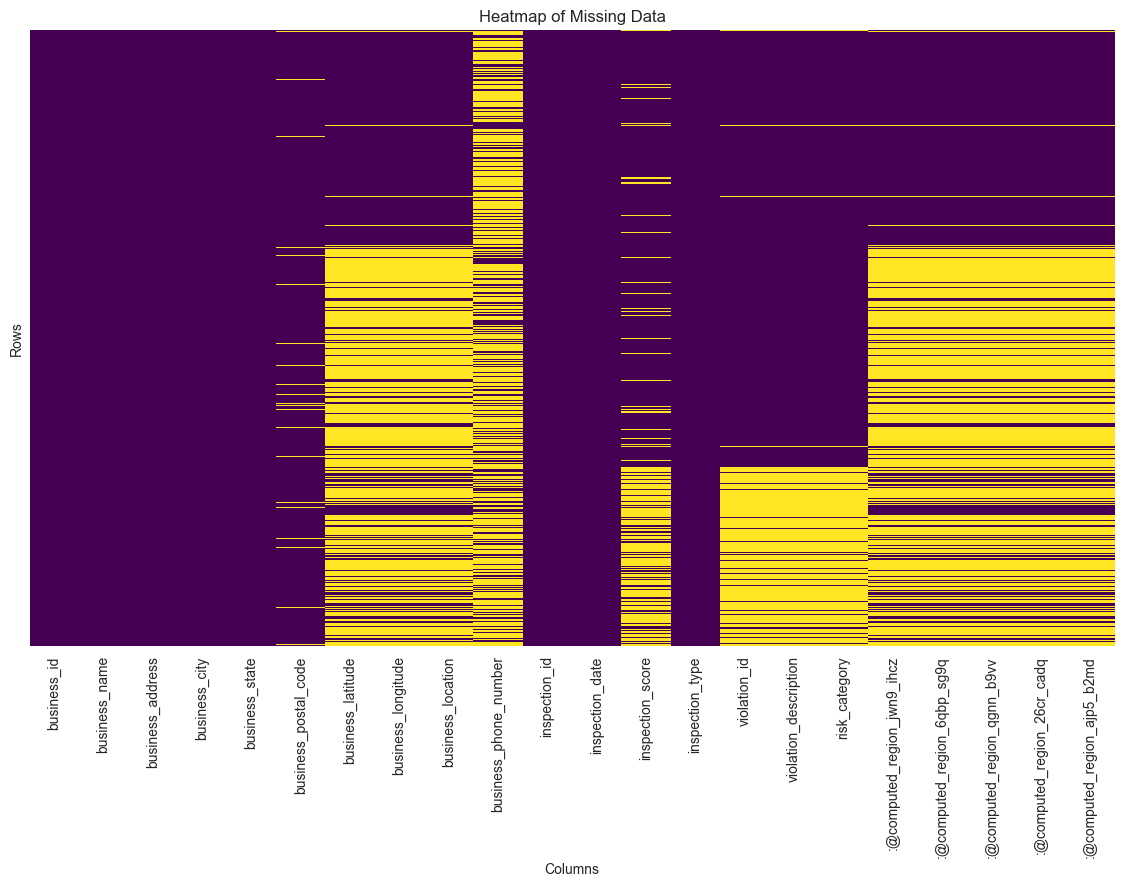

In [104]:
# Set up the figure
plt.figure(figsize=(14, 8))

# Create a heatmap of missing values
sns.heatmap(sf_phi.isnull(), 
            cbar=False, 
            cmap="viridis", 
            yticklabels=False)

plt.title("Heatmap of Missing Data")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

#  Data Preprocessing 


In [105]:
# Dropping missing values 
threshold = 26000  # your custom threshold

# Drop columns with missing values above the threshold
df_cleaned = sf_phi.dropna(axis=1, thresh=len(sf_phi) - threshold)

print("Remaining columns:", sf_phi.columns)


Remaining columns: Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', ':@computed_region_jwn9_ihcz',
       ':@computed_region_6qbp_sg9q', ':@computed_region_qgnn_b9vv',
       ':@computed_region_26cr_cadq', ':@computed_region_ajp5_b2md'],
      dtype='object')


In [106]:
# Count missing values per column
missing_counts = sf_phi.isnull().sum()

# Identify columns with more than 26,000 missing values
cols_to_drop = missing_counts[missing_counts > 26000].index

# Drop them from the DataFrame
sf_phi = sf_phi.drop(columns=cols_to_drop)

# Check result
print(f"Dropped columns: {list(cols_to_drop)}")
print(f"Remaining columns: {df_cleaned.shape[1]}")


Dropped columns: ['business_latitude', 'business_longitude', 'business_location', 'business_phone_number', ':@computed_region_jwn9_ihcz', ':@computed_region_6qbp_sg9q', ':@computed_region_qgnn_b9vv', ':@computed_region_26cr_cadq', ':@computed_region_ajp5_b2md']
Remaining columns: 13


In [107]:
sf_phi

,business_id,business_name,business_address,business_city,business_state,business_postal_code,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,85936_20170925,2017-09-25T00:00:00.000,100.0,Routine - Unscheduled,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,5827_20170224,2017-02-24T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,94910_20180530,2018-05-30T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,64667_20170814,2017-08-14T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,97722_20181217,2018-12-17T00:00:00.000,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,94109,70220_20170913,2017-09-13T00:00:00.000,NaN,Complaint,NaN,NaN,NaN
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,94117,95021_20190228,2019-02-28T00:00:00.000,92.0,Routine - Unscheduled,95021_20190228_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,94124,78289_20161209,2016-12-09T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,94133,100887_20190814,2019-08-14T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN


In [108]:
sf_phi.shape

(53973, 13)

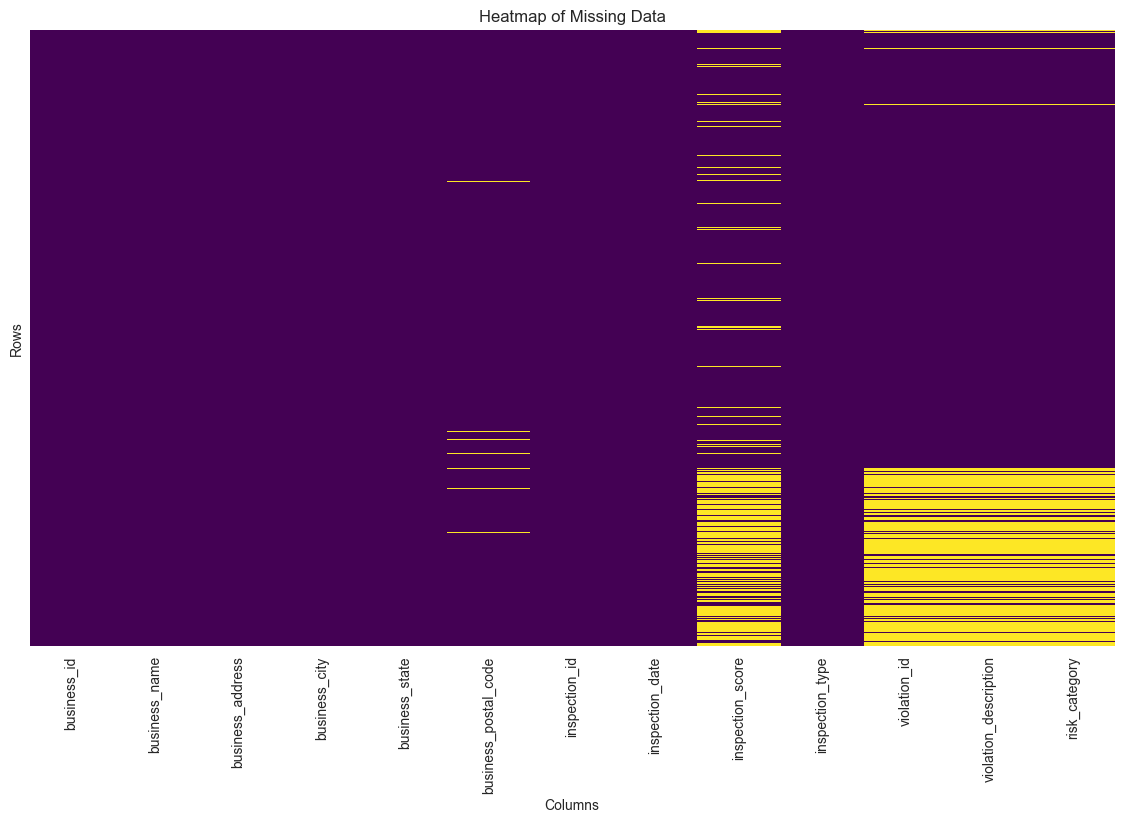

In [109]:
sf_phi.isna().sum()
# Set up the figure
plt.figure(figsize=(14, 8))

# Create a heatmap of missing values
sns.heatmap(sf_phi.isnull(),
            cbar=False,
            cmap="viridis",
            yticklabels=False)

plt.title("Heatmap of Missing Data")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [110]:
sf_phi.drop(['business_id', 'violation_id'], axis=1, inplace=True)

In [111]:
sf_phi.shape

(53973, 11)

# Data Visualisation 

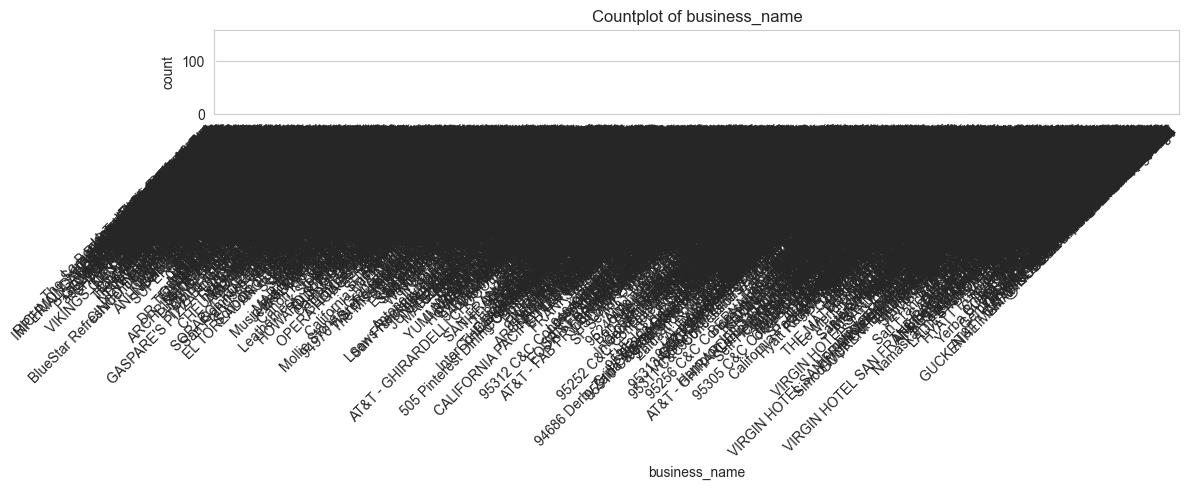

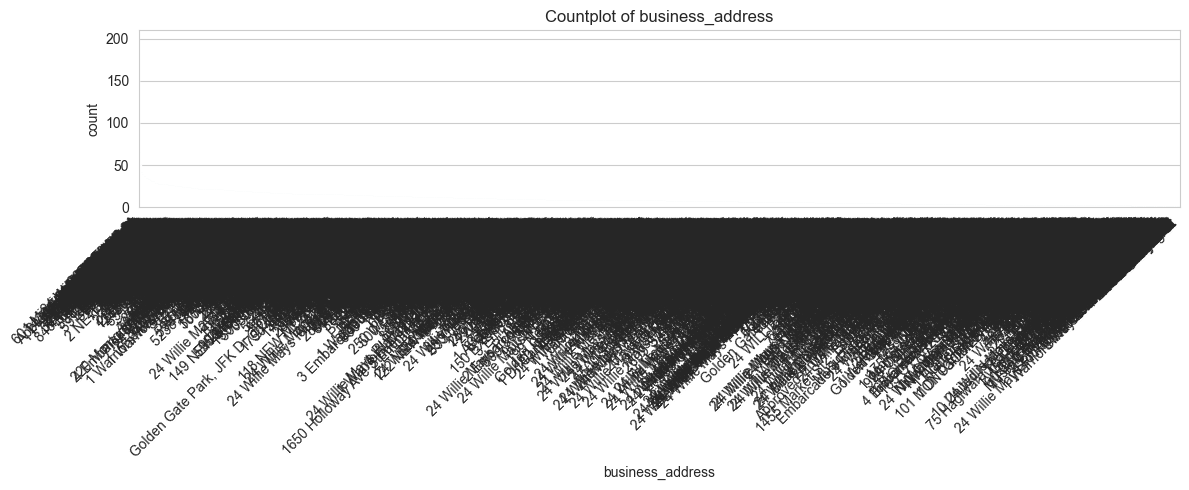

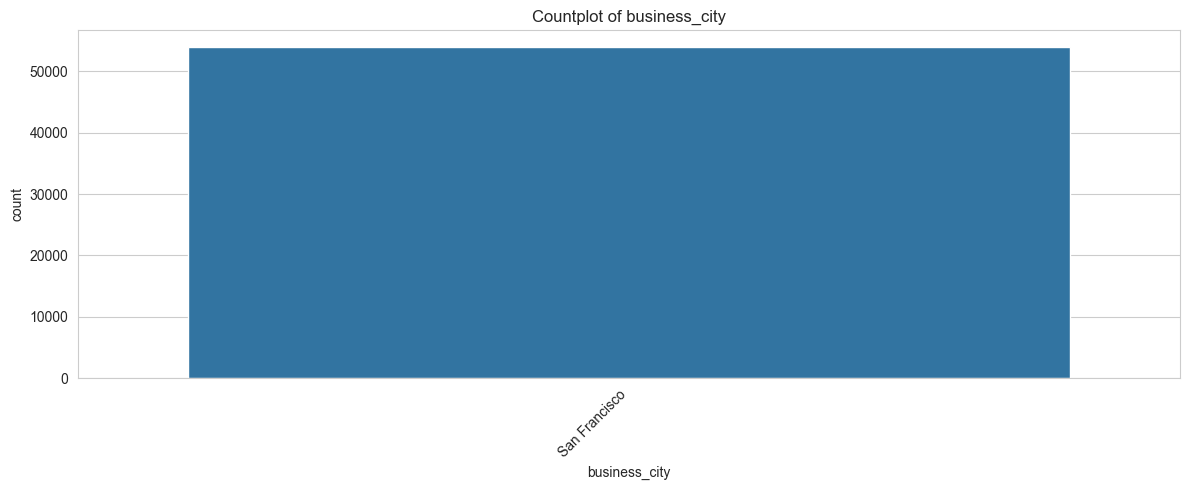

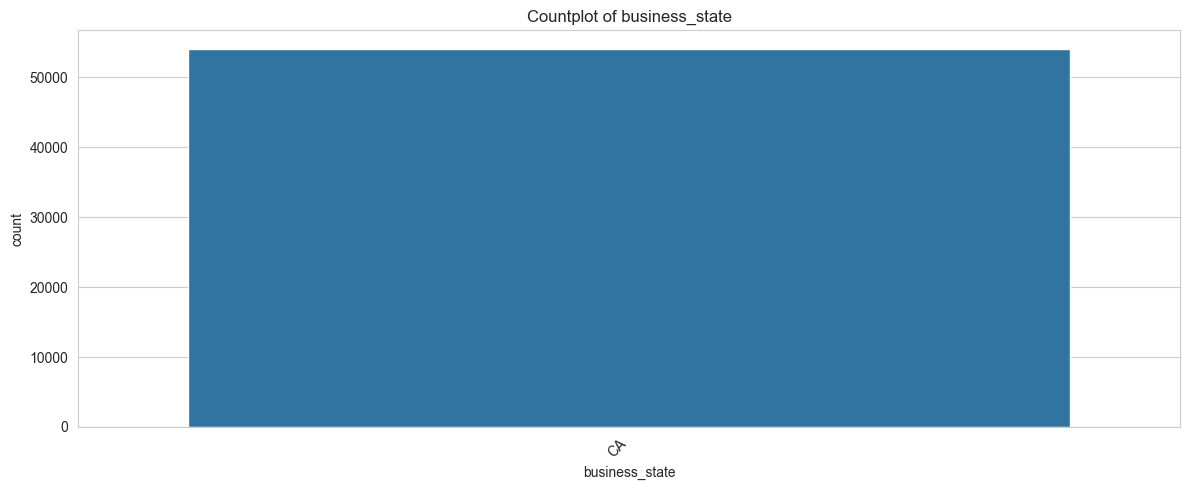

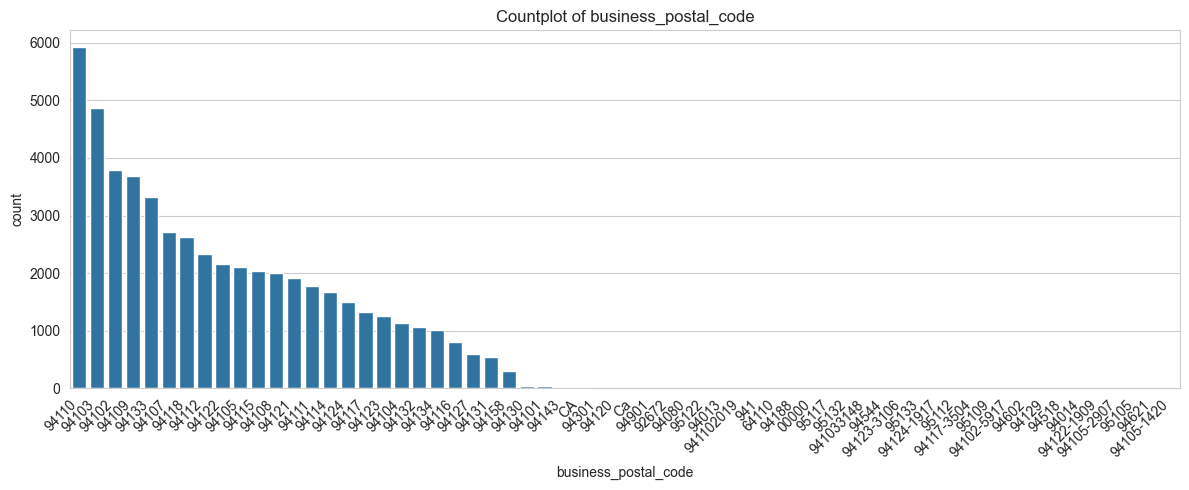

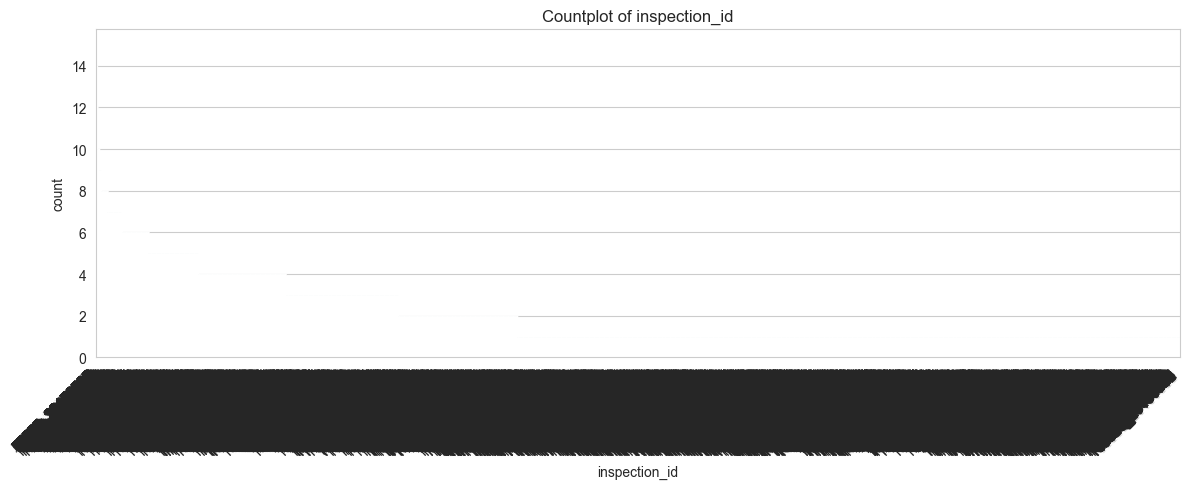

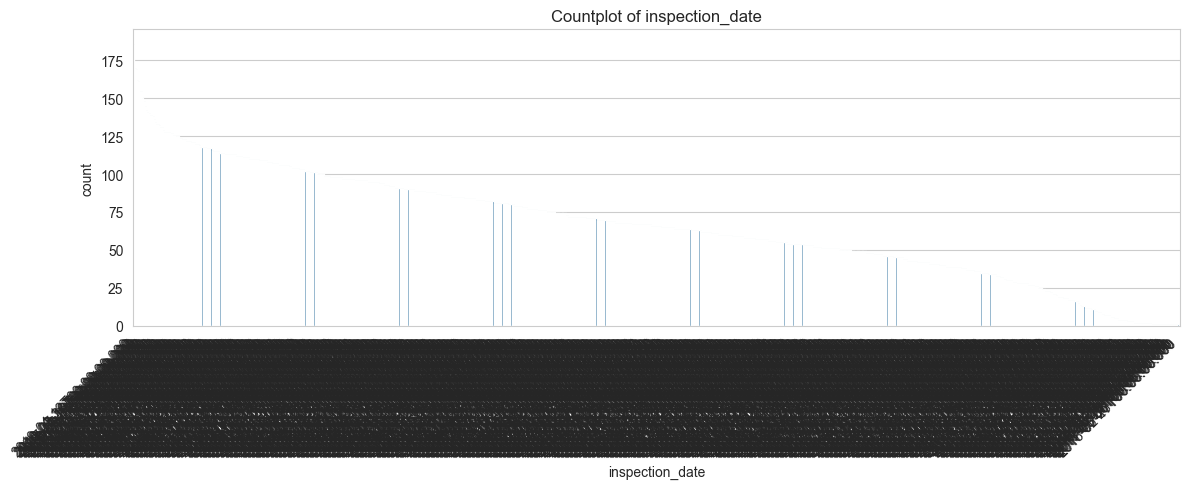

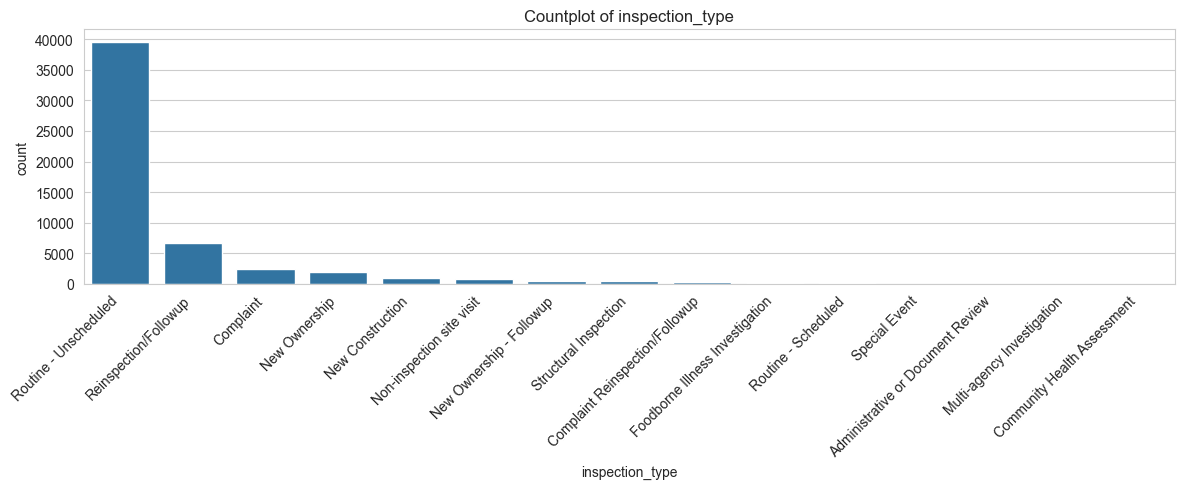

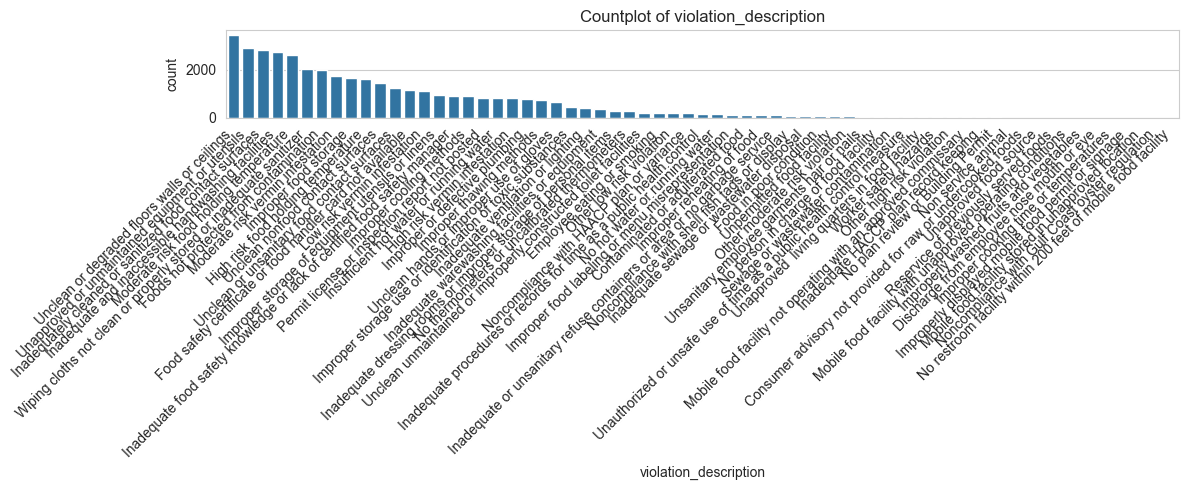

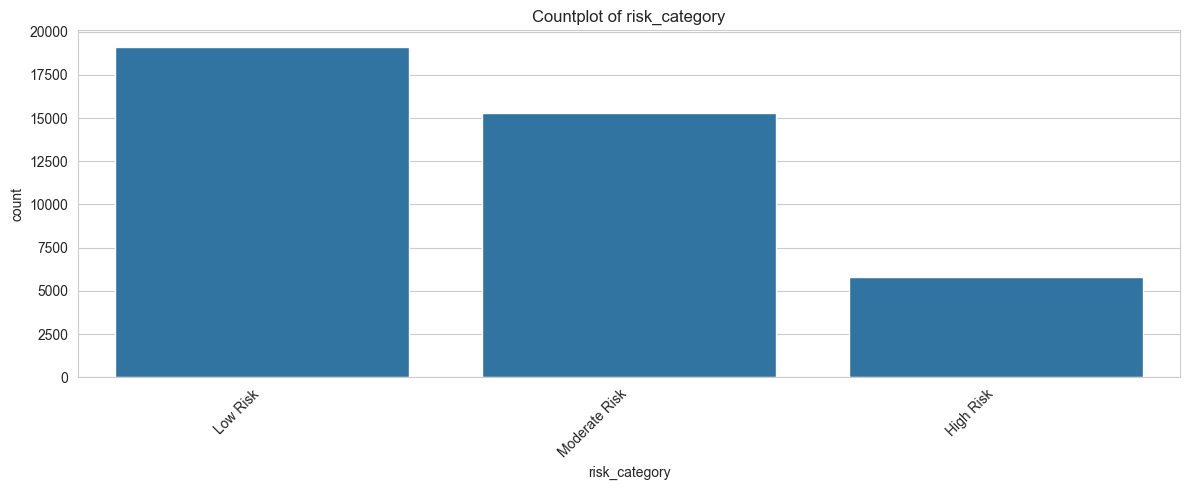

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through only object or category columns (likely to be categorical)
categorical_columns = sf_phi.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=sf_phi, x=column, order=sf_phi[column].value_counts().index)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()


The barplot of the postal code distribution illustratesthat 

<Axes: xlabel='risk_category', ylabel='count'>

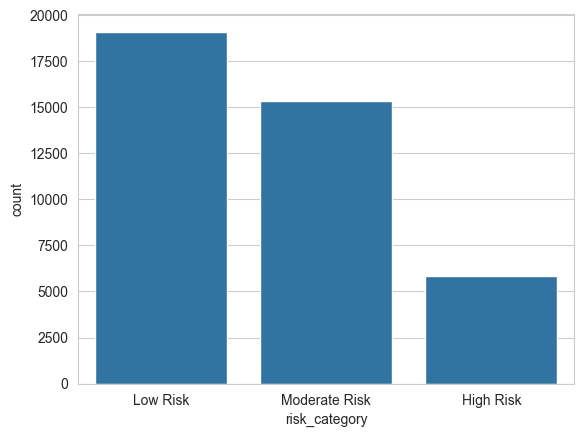

In [113]:
sns.countplot(data = sf_phi, x= 'risk_category')

C:\Users\thaba\PycharmProjects\Heat F\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



<Figure size 3000x2000 with 0 Axes>

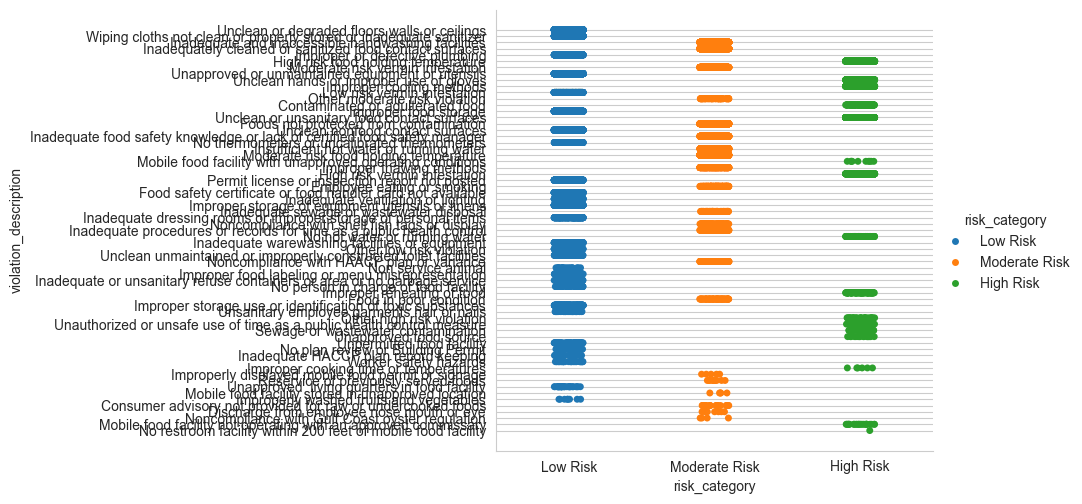

In [114]:
plt.figure(figsize=(30, 20))
sns.catplot(data=sf_phi, x='risk_category', y='violation_description', hue='risk_category', kind='strip')

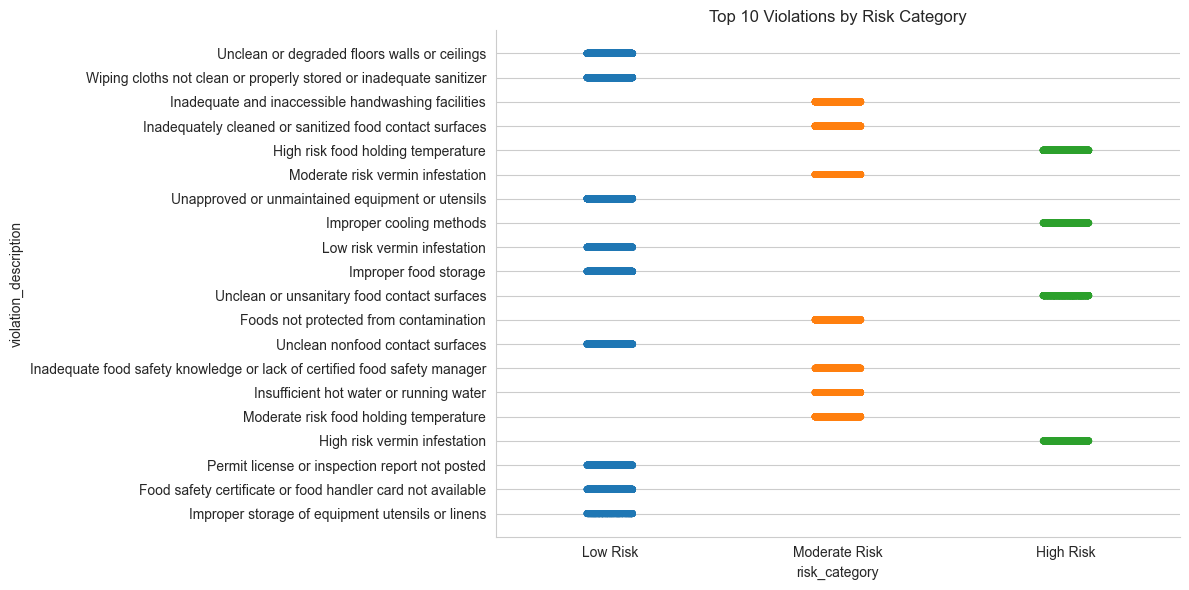

In [115]:
top_violations = sf_phi['violation_description'].value_counts().nlargest(20).index

filtered = sf_phi[sf_phi['violation_description'].isin(top_violations)]

sns.catplot(data=filtered,
            x='risk_category',
            y='violation_description',
            hue='risk_category',
            kind='strip',
            height=6, aspect=2)

plt.title("Top 10 Violations by Risk Category")
plt.tight_layout()
plt.show()


C:\Users\thaba\AppData\Local\Temp\ipykernel_34176\1008397871.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




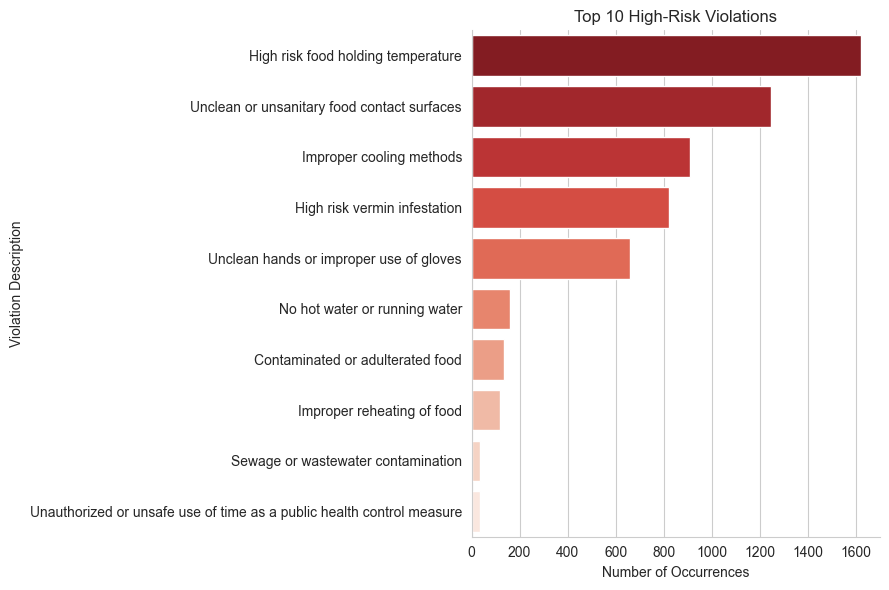

In [116]:

# 1. Filter for high-risk violations
high_risk = sf_phi[sf_phi['risk_category'].str.lower() == 'high risk']

# 2. Get top 10 violation descriptions
top_10 = high_risk['violation_description'].value_counts().nlargest(10)

# 3. Convert to DataFrame for catplot
top_10_df = top_10.reset_index()
top_10_df.columns = ['violation_description', 'count']

# 4. Visualize using catplot
sns.catplot(data=top_10_df,
            y='violation_description',
            x='count',
            kind='bar',
            height=6,
            aspect=1.5,
            palette='Reds_r')

plt.title("Top 10 High-Risk Violations")
plt.xlabel("Number of Occurrences")
plt.ylabel("Violation Description")
plt.tight_layout()
plt.show()


## High Risk Violations 

In [117]:
# 1. Total number of all violations
total_violations = len(sf_phi)

# 2. Total number of medium-risk violations
total_high_risk = sf_phi[sf_phi['risk_category'].str.lower() == 'high risk'].shape[0]

# 3. Calculate percentage
high_risk_percentage = (total_high_risk / total_violations) * 100

# 4. Display result
print(f"High-risk violations make up {high_risk_percentage:.2f}% of all violations.")


High-risk violations make up 10.79% of all violations.


High risk violations make up 10.79% of all violations 

In [118]:
import plotly.express as px

high_risk = sf_phi[sf_phi['risk_category'].str.lower() == 'high risk']

# 2. Get top 10 violation descriptions
top_10_high = high_risk['violation_description'].value_counts().nlargest(10)

# 3. Convert to DataFrame for catplot
top_10_df = top_10_high.reset_index()
top_10_df.columns = ['violation_description', 'count']

# 4. Create interactive bar chart with Plotly
fig = px.bar(
    top_10_df,
    x='count',
    y='violation_description',
    orientation='h',
    color='count',
    color_continuous_scale='Reds',
    title='Top 10 High Risk Violations'
)

fig.update_layout(
    xaxis_title='Number of Occurrences',
    yaxis_title='Violation Description',
    yaxis={'categoryorder': 'total ascending'},  # keeps order of bars
    margin=dict(l=100, r=20, t=50, b=50)
)

fig.show()



In [119]:
# 3. Get total number of all violations in the dataset
total_violations_all_risk = len(sf_phi)


# 4. Calculate percentage of total violations for each top-10 medium-risk description
top_10_high_percent_total = (top_10_high / total_violations_all_risk * 100).round(2)

# 5. Convert to DataFrame
top_10_high_df = top_10_high_percent_total.reset_index()
top_10_high_df.columns = ['violation_description', 'percentage']

# 6. Create interactive bar chart with Plotly
fig = px.bar(
    top_10_high_df,
    x='percentage',
    y='violation_description',
    orientation='h',
    color='percentage',
    color_continuous_scale='Reds',
    title='Top 10 High Risk Violations (% of All Violations)'
)

fig.update_layout(
    xaxis_title='Percentage of All Violations (%)',
    yaxis_title='Violation Description',
    yaxis={'categoryorder': 'total ascending'},
    margin=dict(l=100, r=20, t=50, b=50)
)

fig.show()

The above plot indicates the top 10 High risk violations. 
1. High risk food holding temperature 1620 counts(3%)
2. Unclean or unsanitary foos contact surfaces 1245 counts ( 2.31%)
3. Improper cooling methods 910 counts (1.69%)

## Moderate Risk Violations 


The aim of this section is to invesitigate the medium risk violations :
* The proportion of Medium Risk Violations to all violations 
* The top 10 Medium Risk violations . 
* The top 10 Medium Risk violations and their respective proportion to the  total risk violations 

In [ ]:
# 1. Total number of all violations
total_violations = len(sf_phi)

# 2. Total number of medium-risk violations
total_medium_risk = sf_phi[sf_phi['risk_category'].str.lower() == 'moderate risk'].shape[0]

# 3. Calculate percentage
medium_risk_percentage = (total_medium_risk / total_violations) * 100

# 4. Display result
print(f"Medium-risk violations make up {medium_risk_percentage:.2f}% of all violations.")


Medium risks violations make up 28.38% of all violations 

sfg

In [ ]:
import plotly.express as px

# 1. Filter for moderate-risk violations
med_risk = sf_phi[sf_phi['risk_category'].str.lower() == 'moderate risk']

# 2. Get top 10 violation descriptions
top_10_med = med_risk['violation_description'].value_counts().nlargest(10)

# 3. Convert to DataFrame 
top_10_med_df = top_10_med.reset_index()
top_10_med_df.columns = ['violation_description', 'count']

# 4. Create interactive bar chart with Plotly
fig = px.bar(
    top_10_med_df,
    x='count',
    y='violation_description',
    orientation='h',
    color='count',
    color_continuous_scale='Oranges',
    title='Top 10 Medium Risk Violations'
)

fig.update_layout(
    xaxis_title='Number of Occurrences',
    yaxis_title='Violation Description',
    yaxis={'categoryorder': 'total ascending'},  # keeps order of bars
    margin=dict(l=100, r=20, t=50, b=50)
)

fig.show()


Visualisation of the top 10 Medium violations by count . 

In [ ]:
import plotly.express as px

# 1. Filter for medium-risk violations
med_risk = sf_phi[sf_phi['risk_category'].str.lower() == 'moderate risk']

# 2. Get top 10 medium-risk violation descriptions (by count)
top_10_med = med_risk['violation_description'].value_counts().nlargest(10)

# 3. Get total number of all violations in the dataset
total_violations_all_risk = len(sf_phi)

# 4. Calculate percentage of total violations for each top-10 medium-risk description
top_10_med_percent_total = (top_10_med / total_violations_all_risk * 100).round(2)

# 5. Convert to DataFrame
top_10_med_df = top_10_med_percent_total.reset_index()
top_10_med_df.columns = ['violation_description', 'percentage']

# 6. Create interactive bar chart with Plotly
fig = px.bar(
    top_10_med_df,
    x='percentage',
    y='violation_description',
    orientation='h',
    color='percentage',
    color_continuous_scale='Oranges',
    title='Top 10 Medium Risk Violations (% of All Violations)'
)

fig.update_layout(
    xaxis_title='Percentage of All Violations (%)',
    yaxis_title='Violation Description',
    yaxis={'categoryorder': 'total ascending'},
    margin=dict(l=100, r=20, t=50, b=50)
)

fig.show()


The top 10 medium risk violations are indicated above. 
The top is inadequately cleaned or sanitized food contact surfaces at 2823
The second is inadequate and innaccessable handwashing facilites at 2727
The third is moderate risk food holding temperatures 2623
Though these present as medium risk violations they are may still lead to foodborne diseases and pose a public health risk . Further analysis should be performed to see where these violations are occuring because if clustered in a specific zip code this could increase the risk of acute gastro enteritis.
It is to be noted that the highest medium risk item is at approx 5.23 % of all violations . 

## Low Risk Violations 


In [ ]:
# 1. Total number of all violations
total_violations = len(sf_phi)

# 2. Total number of medium-risk violations
total_low_risk = sf_phi[sf_phi['risk_category'].str.lower() == 'low risk'].shape[0]

# 3. Calculate percentage
low_risk_percentage = (total_low_risk / total_violations) * 100

# 4. Display result
print(f"Low-risk violations make up {low_risk_percentage:.2f}% of all violations.")


The low risk violations consitute 35.48 of all violations . This the greatest proportion of violations . 

In [ ]:
import plotly.express as px

# 1. Filter for moderate-risk violations
low_risk = sf_phi[sf_phi['risk_category'].str.lower() == 'low risk']

# 2. Get top 10 violation descriptions
top_10_low = low_risk['violation_description'].value_counts().nlargest(10)

# 3. Convert to DataFrame 
top_10_low_df = top_10_low.reset_index()
top_10_low_df.columns = ['violation_description', 'count']

# 4. Create interactive bar chart with Plotly
fig = px.bar(
    top_10_low_df,
    x='count',
    y='violation_description',
    orientation='h',
    color='count',
    color_continuous_scale='Greens',
    title='Top 10 Low Risk Violations'
)

fig.update_layout(
    xaxis_title='Number of Occurrences',
    yaxis_title='Violation Description',
    yaxis={'categoryorder': 'total ascending'},  # keeps order of bars
    margin=dict(l=100, r=20, t=50, b=50)
)

fig.show()


In [ ]:
import plotly.express as px

# 3. Get total number of all violations in the dataset
total_violations_all_risk = len(sf_phi)

# 4. Calculate percentage of total violations for each top-10 medium-risk description
top_10_low_percent_total = (top_10_low / total_violations_all_risk * 100).round(2)

# 5. Convert to DataFrame
top_10_low_df = top_10_low_percent_total.reset_index()
top_10_low_df.columns = ['violation_description', 'percentage']

# 6. Create interactive bar chart with Plotly
fig = px.bar(
    top_10_low_df,
    x='percentage',
    y='violation_description',
    orientation='h',
    color='percentage',
    color_continuous_scale='Greens',
    title='Top 10 Low Risk Violations (% of All Violations)'
)

fig.update_layout(
    xaxis_title='Percentage of All Violations (%)',
    yaxis_title='Violation Description',
    yaxis={'categoryorder': 'total ascending'},
    margin=dict(l=100, r=20, t=50, b=50)
)

fig.show()


The top 10 low risk violations are indicated in the interactive bar plot above . 
1. Unclean or degraded floors or walls or ceilings are the top violation with a count of 3453(6,4%)
2. Unnapproved or unmaintained equipment or utensils has a count of 2917 (5.4%) 
3. Wiping cloths not clean or properly stored or inadequate sanitizer with a count of 2025 (3,75 %) 



In [ ]:
sf_phi.shape


# Trend of Violation Risk over Time 

In [ ]:
sf_phi['inspection_score'].describe()

Statistical analysis of Inspection scores:
* The mean inspection score is 86.2% 
* The standard deviationis 8.4 indicating a large variance 
* The least score is 45
* The highest score is 100 
* 


Now to visulalise the distribution utilising a barplot 

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='inspection_score', data=sf_phi, )
plt.title('Box plot of Inspection Score')


The box plot reveals that the majority of score lie in the range of 81 - 94 how ever shows there is a wide variance and standard deviation . There are a few outliers with low scores . 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of inspection_score grouped by inspection_type
sns.catplot(
    data=sf_phi,
    x='inspection_type',
    y='inspection_score',
    kind='box',
    height=6,
    aspect=2
)

plt.xticks(rotation=45)
plt.title('Inspection Scores by Inspection Type')
plt.tight_layout()
plt.show()


In [ ]:
sf_phi['inspection_score'].isna().sum()

In [ ]:
lowest_scores_df = sf_phi.nsmallest(500, 'inspection_score')

inspection_type_counts = lowest_scores_df['inspection_type'].value_counts().reset_index()
inspection_type_counts.columns = ['inspection_type', 'count']

fig = px.bar(
    inspection_type_counts,
    x='count',
    y='inspection_type',
    orientation='h',
    title='Violations in the 10 Lowest Scoring Inspections',
    labels={'count': 'Frequency', 'inspection_type': 'Inspection Type'}
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


In [ ]:
import plotly.graph_objects as go

# Step 1: Get the 10 lowest scoring inspections
lowest_scores_df = sf_phi.nsmallest(110, 'inspection_score')

# Step 2: Drop duplicates to keep only one entry per business
unique_businesses = lowest_scores_df[['business_name', 'business_postal_code', 'inspection_score', 'inspection_type','risk_category', 'inspection_date']]
unique_businesses = unique_businesses.drop_duplicates(subset='business_name')

# Step 3: Interactive table
fig = go.Figure(data=[go.Table(
    header=dict(values=list(unique_businesses.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[unique_businesses[col] for col in unique_businesses.columns],
               fill_color='white',
               align='left'))
])

fig.update_layout(title='Unique Businesses from the 10 Lowest Scoring Inspections')
fig.show()


|Here we see the table above indicates the business names with the Top 10 lowest scoring inspection scores, the risk categories, inpection date and the zip code
It can be deduced that these are realised at routine unscheduled inspections. 

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Ensure datetime is in proper format
sf_phi['inspection_date'] = pd.to_datetime(sf_phi['inspection_date'])

# Step 1: Filter only for initial inspections
initial_inspections = sf_phi[sf_phi['inspection_type'].str.lower().str.contains('routine', na=False)]

# Step 2: Sort by business and inspection score, then date
initial_sorted = initial_inspections.sort_values(['business_name', 'inspection_score', 'inspection_date'])

# Step 3: Keep the lowest scoring initial inspection per business
lowest_per_business = initial_sorted.drop_duplicates(subset='business_name', keep='first')

# Step 4: Get the 10 lowest scoring unique businesses
lowest_10 = lowest_per_business.nsmallest(10, 'inspection_score').copy()

# Step 5: Sort full dataset for future inspection lookup
sf_phi_sorted = sf_phi.sort_values(['business_name', 'inspection_date'])

# Step 6: Compare to the next "routine" or "unscheduled" inspection
results = []

for _, row in lowest_10.iterrows():
    biz = row['business_name']
    date = row['inspection_date']
    score = row['inspection_score']
    this_id = row['inspection_id']
    
    # Filter for next inspections of the same business (excluding the current one)
    future = sf_phi_sorted[
        (sf_phi_sorted['business_name'] == biz) &
        (sf_phi_sorted['inspection_date'] > date) &
        (sf_phi_sorted['inspection_id'] != this_id) &
        (
            sf_phi_sorted['inspection_type'].str.lower().str.contains('routine|unscheduled', na=False)
        )
    ]
    
    if not future.empty:
        next_row = future.iloc[0]
        improved = next_row['inspection_score'] > score
        
        results.append({
            'inspection_id': this_id,
            'business_name': biz,
            'original_score': score,
            'original_date': date,
            'next_inspection_id': next_row['inspection_id'],
            'next_inspection_date': next_row['inspection_date'],
            'next_score': next_row['inspection_score'],
            'inspection_type': next_row['inspection_type'],
            'improved': improved
        })
    else:
        results.append({
            'inspection_id': this_id,
            'business_name': biz,
            'original_score': score,
            'original_date': date,
            'next_inspection_id': None,
            'next_inspection_date': None,
            'next_score': None,
            'inspection_type': None,
            'improved': None
        })

# Step 7: Convert results to DataFrame
results_df = pd.DataFrame(results)

# Step 8: Interactive improvement chart
fig = go.Figure()

for _, row in results_df.iterrows():
    if pd.notnull(row['next_score']):
        fig.add_trace(go.Scatter(
            x=[row['original_date'], row['next_inspection_date']],
            y=[row['original_score'], row['next_score']],
            mode='lines+markers+text',
            name=f"{row['business_name']} ({row['inspection_id']})",
            marker=dict(color='green' if row['improved'] else 'red'),
            line=dict(color='green' if row['improved'] else 'red', width=2),
            text=[None, f"{row['next_score']}"],
            textposition='top center',
            hoverinfo='text',
            hovertext=[
                f"{row['business_name']}<br>Initial Score: {row['original_score']}<br>Date: {row['original_date'].date()}",
                f"Next Score: {row['next_score']}<br>Date: {row['next_inspection_date'].date()}<br>Type: {row['inspection_type']}"
            ]
        ))

fig.update_layout(
    title='Score Changes from Initial Low-Scoring Inspections to Next Routine/Unscheduled Visit',
    xaxis_title='Inspection Date',
    yaxis_title='Inspection Score',
    hovermode='closest',
    height=600
)

fig.show()


In [ ]:
results_df

In [ ]:
lowest_10

In [ ]:
results = []

for _, row in lowest_10.iterrows():
    biz = row['business_name']
    date = row['inspection_date']
    score = row['inspection_score']
    this_id = row['inspection_id']
    
    # Get all inspections for that business *after* the current inspection date, excluding the same ID
    future = sf_phi_sorted[
        (sf_phi_sorted['business_name'] == biz) &
        (sf_phi_sorted['inspection_date'] > date) &
        (sf_phi_sorted['inspection_id'] != this_id) &
        (sf_phi_sorted['inspection_type'].str.lower().str.contains('reinspection|unscheduled|complaint', na=False))
    ]
    
    if not future.empty:
        next_row = future.iloc[0]
        improved = next_row['inspection_score'] > score
        
        results.append({
            'inspection_id': this_id,
            'business_name': biz,
            'original_score': score,
            'original_date': date,
            'next_inspection_id': next_row['inspection_id'],
            'next_inspection_date': next_row['inspection_date'],
            'next_score': next_row['inspection_score'],
            'inspection_type': next_row['inspection_type'],
            'improved': improved
        })
    else:
        results.append({
            'inspection_id': this_id,
            'business_name': biz,
            'original_score': score,
            'original_date': date,
            'next_inspection_id': None,
            'next_inspection_date': None,
            'next_score': None,
            'inspection_type': None,
            'improved': None
        })

import pandas as pd
results_df = pd.DataFrame(results)


In [ ]:
results_df

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for _, row in results_df.iterrows():
    if pd.notnull(row['next_score']):
        fig.add_trace(go.Scatter(
            x=[row['original_date'], row['next_inspection_date']],
            y=[row['original_score'], row['next_score']],
            mode='lines+markers+text',
            text=[None, f"{row['next_score']}"],
            textposition='top center',
            name=f"{row['business_name']} ({row['inspection_id']})",
            marker=dict(color='green' if row['improved'] else 'red'),
            line=dict(color='green' if row['improved'] else 'red', width=2),
            hovertext=[
                f"{row['business_name']}<br>Original Score: {row['original_score']}<br>Date: {row['original_date'].date()}<br>ID: {row['inspection_id']}",
                f"Next Score: {row['next_score']}<br>Date: {row['next_inspection_date'].date()}<br>Type: {row['inspection_type']}<br>ID: {row['next_inspection_id']}"
            ],
            hoverinfo='text'
        ))

fig.update_layout(
    title='Score Improvement from the 10 Lowest Unique Inspections',
    xaxis_title='Inspection Date',
    yaxis_title='Inspection Score',
    hovermode='closest',
    height=600
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

results_df = pd.DataFrame(results)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(results_df.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[results_df[col] for col in results_df.columns],
               fill_color='white',
               align='left'))
])

fig.update_layout(title='Follow-up on the 10 Lowest Scoring Inspections')
fig.show()


In [ ]:
lollipot_df = sf_phi[sf_phi['business_name'].str.lower() == 'lollipoT'.lower()]
lollipot_df


In [ ]:
# Step 1: Filter for inspection type "Complaint"
complaint_inspections = sf_phi[sf_phi['inspection_type'].str.lower().str.contains('complaint', na=False)]

# Step 2: Within those, filter for high risk category
high_risk_complaints = complaint_inspections[complaint_inspections['risk_category'].str.lower() == 'high risk']

# Step 3: View the result
print(high_risk_complaints[['business_name', 'inspection_date', 'risk_category', 'inspection_type']])



# Risk Category by Inpection type 

In [ ]:
# 1. Filter for "Complaint" inspection types
complaints = sf_phi[sf_phi['inspection_type'].str.lower().str.contains('complaint', na=False)]

# 2. Count how many complaints fall under each risk category
complaint_risk_counts = complaints['risk_category'].value_counts().reset_index()
complaint_risk_counts.columns = ['risk_category', 'count']

# 3. Add percentage
total = complaint_risk_counts['count'].sum()
complaint_risk_counts['percent'] = (complaint_risk_counts['count'] / total * 100).round(2)
import plotly.express as px

fig = px.bar(
    complaint_risk_counts,
    x='risk_category',
    y='count',
    color='risk_category',
    text='percent',
    title='Number of Complaint Inspections by Risk Category',
    labels={'count': 'Number of Complaints', 'risk_category': 'Risk Category'}
)

fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(yaxis_title='Complaint Count')
fig.show()


In [ ]:
# 2. Group by inspection_type and risk_category
grouped = sf_phi.groupby(['inspection_type', 'risk_category']).size().reset_index(name='count')

# 3. Calculate percentages per inspection_type
grouped['percent'] = grouped.groupby('inspection_type')['count'].transform(lambda x: (x / x.sum() * 100).round(2))
import plotly.express as px

fig = px.bar(
    grouped,
    x='risk_category',
    y='count',
    color='risk_category',
    text='percent',
    facet_col='inspection_type',
    facet_col_wrap=3,
    title='Risk Category Distribution Across Inspection Types',
    labels={'count': 'Inspection Count', 'risk_category': 'Risk Category'}
)

fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(yaxis_title='Count', xaxis_title='Risk Category', showlegend=False)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Clean facet labels
fig.show()


In [ ]:
# 1. Filter for "Complaint" inspection types
sp_event = sf_phi[sf_phi['inspection_type'].str.lower().str.contains('special event', na=False)]

# 2. Count how many complaints fall under each risk category
sp_event_risk_counts = sp_event['risk_category'].value_counts().reset_index()
sp_event_risk_counts.columns = ['risk_category', 'count']

# 3. Add percentage
total = sp_event_risk_counts['count'].sum()
sp_event_risk_counts['percent'] = (sp_event_risk_counts['count'] / total * 100).round(2)
import plotly.express as px

fig = px.bar(
    sp_event_risk_counts,
    x='risk_category',
    y='count',
    color='risk_category',
    text='percent',
    title='Number of Special Event Inspections by Risk Category',
    labels={'count': 'Number of Special Events', 'risk_category': 'Risk Category'}
)

fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(yaxis_title='Special Events Count')
fig.show()


The special events obviously were few . There are a total of 7 and of these 7 the proportion of Special events with a high risk category of 57.14. This provides evidence that in special events there should be health inspections to ensure that no foodborne illnesses are transmitted. However it is difficult to apportion resources to such a small subset in the space of 3 years . It would be wise to look at logs or outbreak information regarding this in relation to the facilities involved. 

In [ ]:
)import plotly.express as px

# Prepare data
lowest_scores_df = sf_phi.nsmallest(10, 'inspection_score')
violation_summary = lowest_scores_df.groupby('violation_description').agg({
    'business_name': lambda x: ', '.join(x.unique()),
    'business_postal_code': lambda x: ', '.join(x.astype(str).unique()),
    'inspection_score': 'count'  # how many times each violation appears
}).reset_index()

violation_summary.columns = ['violation_description', 'businesses', 'zip_codes', 'count']

# Plot
fig = px.bar(
    violation_summary,
    x='count',
    y='violation_description',
    orientation='h',
    hover_data=['businesses', 'zip_codes'],
    title='Violations from the 10 Lowest Scoring Inspections',
    labels={'count': 'Occurrence Count', 'violation_description': 'Violation Description'}
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


In [ ]:
sf_phi['inspection_date'] = pd.to_datetime(sf_phi['inspection_date'], errors='coerce')
# Convert inspection colum to date time 

In [ ]:
# Sort vallues by inspection date
sf_phi = sf_phi.sort_values(by='inspection_date')


In [ ]:
#Group by month inspection score 

In [ ]:
# Resample by month and compute mean inspection score
time_trend = (
    sf_phi.set_index('inspection_date')
          .resample('ME')['inspection_score']
          .mean()
          .reset_index()
)


In [ ]:
# Plot the line plot 
plt.figure(figsize=(14, 6))
sns.lineplot(data=time_trend, x='inspection_date', y='inspection_score', marker='o')

plt.title("Monthly Average Inspection Score Over Time")
plt.xlabel("Inspection Date")
plt.ylabel("Average Inspection Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The line plot shows trends of average Inspection scores of all spanning from 2017 to 2019
The scores fluctuate during the months 

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
sns.lineplot(data=time_trend, x='inspection_date', y='inspection_score', marker='o')

# Set xticks to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g. Jan 2023

plt.title("Monthly Average Inspection Score Over Time")
plt.xlabel("Inspection Date")
plt.ylabel("Average Inspection Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Assuming time_trend has columns: 'inspection_date', 'inspection_score'
fig = px.line(
    time_trend,
    x='inspection_date',
    y='inspection_score',
    title='Monthly Average Inspection Score Over Time',
    markers=True,
    labels={
        'inspection_date': 'Inspection Date',
        'inspection_score': 'Average Score'
    }
)

# Customize layout
fig.update_layout(
    xaxis=dict(
        tickformat="%b %Y",        # Format e.g., Jan 2023
        tickangle=90,
        dtick="M1"                 # Monthly interval
    ),
    height=600,
    width=1000
)

fig.show()


The line plot shows trends of average Inspection scores of all spanning from 2017 to 2019
The scores fluctuate during the months and there is no consistent pattern that can be identified eg seasonal. 

In [ ]:

# Normalize capitalization in risk_category (e.g., 'high risk' -> 'High Risk')
sf_phi['risk_category'] = sf_phi['risk_category'].str.title()

# Filter to known risk categories only
valid_risks = ['High Risk', 'Moderate Risk', 'Low Risk']
sf_phi_filtered = sf_phi[sf_phi['risk_category'].isin(valid_risks)]

# Group by month and risk category, then calculate average inspection score
time_trend_risk = (
    sf_phi_filtered
    .set_index('inspection_date')
    .groupby([pd.Grouper(freq='M'), 'risk_category'])['inspection_score']
    .mean()
    .reset_index()
)

# Plot the trend with Plotly Express
fig = px.line(
    time_trend_risk,
    x='inspection_date',
    y='inspection_score',
    color='risk_category',
    title='Inspection Score Trends Over Time by Risk Category',
    markers=True,
    labels={
        'inspection_date': 'Inspection Date',
        'inspection_score': 'Average Score',
        'risk_category': 'Risk Category'
    }
)

# Customize layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Average Inspection Score",
    xaxis=dict(
        tickformat="%b %Y",
        tickangle=45,
        dtick="M1"
    ),
    height=600,
    width=1000
)

fig.show()


In [ ]:
# Step 1: Standardize the 'risk_category' column
sf_phi['risk_category'] = sf_phi['risk_category'].str.title()

# Step 2: Filter to high-risk only
high_risk = sf_phi[sf_phi['risk_category'] == 'High Risk']

# Step 3: Count high-risk occurrences per business
high_risk_counts = high_risk['business_name'].value_counts().nlargest(20)

# Display top 10 businesses with most high-risk inspections
print("Top 10 Businesses with Most High-Risk Inspections:")
print(high_risk_counts)


In [ ]:

# Get top 10 businesses
top_high_risk = high_risk['business_name'].value_counts().nlargest(10).reset_index()
top_high_risk.columns = ['business_name', 'count']


In [ ]:
import plotly.express as px

fig = px.bar(
    top_high_risk,
    x='count',
    y='business_name',
    orientation='h',  # Horizontal bars
    title='Top 10 Businesses with Most High-Risk Inspections',
    labels={'count': 'Number of High-Risk Inspections', 'business_name': 'Business Name'},
    color='count',
    color_continuous_scale='Reds'
)

fig.update_layout(
    yaxis=dict(autorange="reversed"),  # Show highest count at top
    height=600
)

fig.show()


In [ ]:
top_business = high_risk['business_name'].value_counts().idxmax()
print(f"Business with most high-risk violations: {top_business}")


In [ ]:
top_business_violations = high_risk[high_risk['business_name'] == top_business]

# Display unique violation types
violation_types = top_business_violations['violation_description'].value_counts()
print(violation_types)


In [ ]:
violation_summary = (
    high_risk
    .groupby(['business_name', 'violation_description'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

violation_summary.head(20)  # View top 20 combinations


In [ ]:
import plotly.express as px

fig = px.bar(
    violation_summary.head(20),
    x='count',
    y='violation_description',
    color='business_name',
    title='Most Common High-Risk Violations by Business',
    labels={'count': 'Number of Violations', 'violation_description': 'Violation Type'},
    height=600
)

fig.update_layout(yaxis=dict(autorange='reversed'))
fig.show()


In [ ]:
# Count violation types for that business
violation_types = top_business_violations['violation_description'].value_counts().reset_index()
violation_types.columns = ['violation_description', 'count']

# Create a summary table for all businesses and their high-risk violation types
violation_summary = (
    high_risk.groupby(['business_name', 'violation_description'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Interactive bar plot for top 20 violations across all businesses
fig = px.bar(
    violation_summary.head(20),
    x='count',
    y='violation_description',
    color='business_name',
    title='Most Common High-Risk Violations by Business',
    labels={'count': 'Number of Violations', 'violation_description': 'Violation Type'},
    height=600
)
fig.update_layout(yaxis=dict(autorange='reversed'))

In [ ]:
# Filter to valid risk categories only
valid_risks = ['High Risk', 'Moderate Risk', 'Low Risk']
sf_phi = sf_phi[sf_phi['risk_category'].isin(valid_risks)]

# Group by month and risk category to compute counts over time
risk_trend = (
    sf_phi.set_index('inspection_date')
          .groupby([pd.Grouper(freq='ME'), 'risk_category'])
          .size()
          .reset_index(name='count')
)

# Group by zip code and risk category to compute violation counts
if 'business_postal_code' not in sf_phi.columns:
    zip_col = [col for col in sf_phi.columns if 'zip' in col.lower()]
    if zip_col:
        sf_phi.rename(columns={zip_col[0]: 'zip_code'}, inplace=True)
    else:
        raise KeyError("No ZIP code column found in the dataset.")

zip_risk_summary = (
    sf_phi.groupby(['business_postal_code', 'risk_category'])
          .size()
          .reset_index(name='count')
          .sort_values(by='count', ascending=False)
)

import plotly.express as px

# Plot 1: Risk trend over time
fig_trend = px.line(
    risk_trend,
    x='inspection_date',
    y='count',
    color='risk_category',
    title='Inspection Volume by Risk Category Over Time',
    labels={'inspection_date': 'Date', 'count': 'Number of Inspections', 'risk_category': 'Risk Level'},
    markers=True
)

# Plot 2: Violations by ZIP code and risk level
fig_zip = px.bar(
    zip_risk_summary,
    x='business_postal_code',
    y='count',
    color='risk_category',
    title='Violation Counts by ZIP Code and Risk Category',
    labels={'zip_code': 'ZIP Code', 'count': 'Violation Count', 'risk_category': 'Risk Level'},
    barmode='group',
    height=600
)

fig_trend.show()
fig_zip.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset if not already
# sf_phi = pd.read_csv("your_file.csv")

# Step 1: Normalize the 'risk_category' column
sf_phi['risk_category'] = sf_phi['risk_category'].str.title()

# Step 2: Filter to high-risk violations
high_risk = sf_phi[sf_phi['risk_category'] == 'High Risk']

# Step 3: Find business with most high-risk violations
top_business = high_risk['business_name'].value_counts().idxmax()
print(f"Business with most high-risk violations: {top_business}")

# Step 4: Get all high-risk violations for that business
top_business_violations = high_risk[high_risk['business_name'] == top_business]

# Step 5: Count types of violations for that business
violation_types = top_business_violations['violation_description'].value_counts().reset_index()
violation_types.columns = ['violation_description', 'count']
print("\nTop Violation Types for This Business:")
print(violation_types)

# Step 6: Create summary of high-risk violations for all businesses
violation_summary = (
    high_risk
    .groupby(['business_name', 'violation_description'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Step 7: Interactive plot of top 20 high-risk violation types
fig = px.bar(
    violation_summary.head(20),
    x='count',
    y='violation_description',
    color='business_name',
    title='Top 20 High-Risk Violations by Business',
    labels={'count': 'Number of Violations', 'violation_description': 'Violation Type'},
    height=600
)
fig.update_layout(yaxis=dict(autorange='reversed'))
fig.show()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter and normalize risk categories (case-insensitive)
sf_phi['risk_category'] = sf_phi['risk_category'].str.title()

# 2. Filter only valid risk categories
valid_risks = ['High Risk', 'Moderate Risk', 'Low Risk']
filtered = sf_phi[sf_phi['risk_category'].isin(valid_risks)]

# 3. Get top 10 violations across ALL categories (not just high risk)
top_violations = (
    filtered['violation_description']
    .value_counts()
    .nlargest(20)
    .index
)

# 4. Subset to only those top violations
subset = filtered[filtered['violation_description'].isin(top_violations)]

# 5. Group and count for plotting
plot_df = (
    subset
    .groupby(['violation_description', 'risk_category'])
    .size()
    .reset_index(name='count')
)

# 6. Plot using catplot (grouped bars)
sns.catplot(data=plot_df,
            kind='bar',
            x='count',
            y='violation_description',
            hue='risk_category',
            height=7,
            aspect=1.8)

plt.title("Top 10 Violations by Risk Category")
plt.xlabel("Number of Occurrences")
plt.ylabel("Violation Description")
plt.tight_layout()
plt.show()


